<h1 align = center>Introduction</h1><br>
<b>The task is</b> to obtain a power spectral density (PSD) from a signal or a group of signals, and to simulate random signals that have the same PSD. For now, the phase is ignored.<br>
<b>The method is</b> to turn an original PSD into a frequency filter, to generate random noise, to filter that noise through the filter.<br>
<b>Sections:</b><br>
1. Simple 1D shaping filteres simulation <br>
2. 1D shaping filteres simulating of a group of signals <br>
3. 2D shaping filters simulation <br>

<h1 align = center>1. Simple 1D shaping filteres simulation</h1>

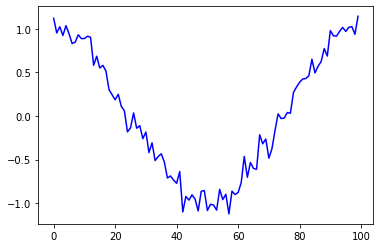

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import ifft

# Period
T = 2 * np.pi
# Number of sample points
N = 100
# Linspace
t = np.linspace(0.0, T, N, endpoint=False)
# Original signal
input_sig = np.cos(t) + np.random.normal(0, 0.1, N)
# Drawing
plt.plot(input_sig, 'b')

max error:  8.43769498715119e-15
mean error:  1.6974442684780655e-15


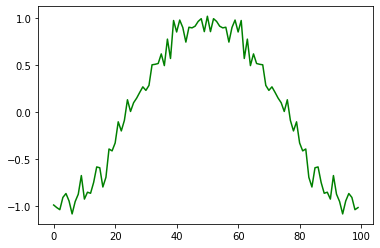

In [5]:
# Fourier transform
input_ft = fft(input_sig)
# PSD
input_psd = abs(input_ft)**2
# Generating noise
noise = np.random.normal(0, 1, N)
noise_ft = fft(noise)
# using noise as a filter to create a simulated signal's FT
output_ft = noise_ft
output_ft.real = np.sqrt(input_psd) * np.sign(noise_ft.real)
output_signal = ifft(output_ft.real) # SIMULATED SIGNAL
plt.plot(output_signal.real, 'g')
# Checking accuracy - somparing input and output PSD
output_ft2 = fft(output_signal.real) #is not neccessary and works the same
output_psd = abs(output_ft2)**2
print("max error: ", max(abs(output_psd - input_psd)))
print("mean error: ", np.mean(abs(output_psd - input_psd)))

<h1 align = center>2. 1D shaping filteres simulating of a group of signals</h1>

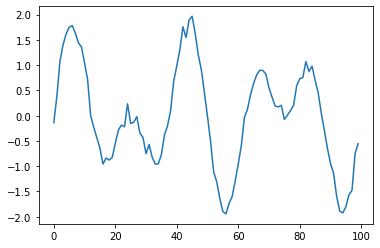

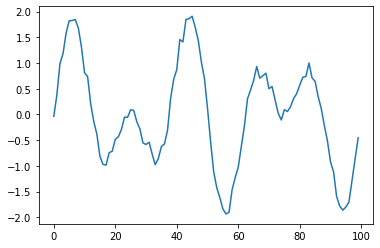

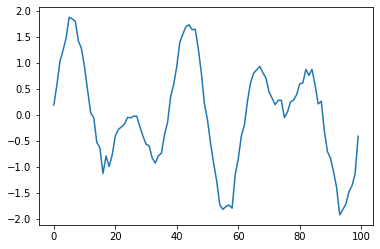

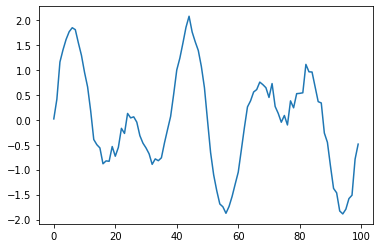

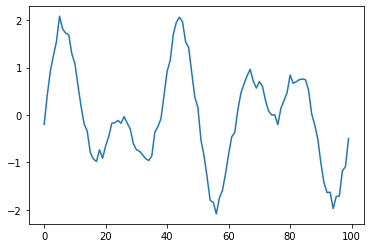

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import ifft

# Period
T = 2 * np.pi
# Number of sample points
N = 100
# Number of input signals
n = 5
# Number of output signals
m = 5
# Linspace
t = np.linspace(0.0, T, N, endpoint=False)
# Signals
input_sigs = []
input_fts = []
input_psd = 0
input_avg = 0
input_max = 0
for i in range(n):
    # Input signal with random noise
    input_sigs.append(np.sin(5 * t) + np.sin(3 * t) + np.random.normal(0, 0.1, N))
    input_fts.append(fft(input_sigs[i]))
    input_max = max(input_max, max(abs(input_sigs[i].real)))
    # PSD
    input_psd += abs(input_fts[i])**2
    plt.plot(input_sigs[i].real)
    plt.show()
input_psd /= n

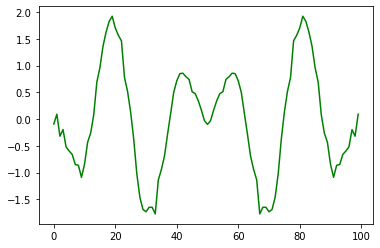

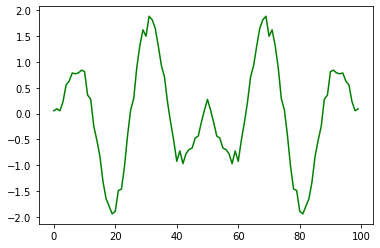

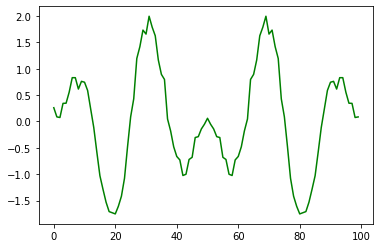

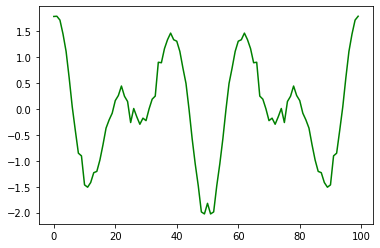

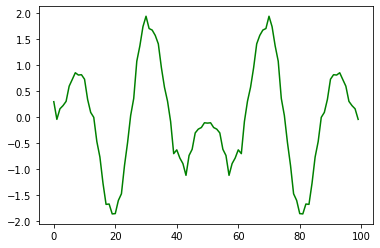

max error:  3.552713678800501e-15
mean error:  1.3145040611561853e-15


In [14]:
output_psd = 0
for i in range(m):
    # Generating noise
    noise = np.random.normal(0, 1, N)
    noise_ft = fft(noise)
    # Using noise as a filter to create a simulated signal's FT
    output_ft = noise_ft
    output_ft.real = np.sqrt(input_psd) * np.sign(noise_ft.real)
    output_signal = ifft(output_ft.real) # SIMULATED SIGNAL
    plt.plot(output_signal.real, 'g')
    plt.show()
    # Calculating new PSD
    output_psd += abs(fft(output_signal.real))**2
output_psd /= m
print("max error: ", max(abs(output_psd - input_psd)))
print("mean error: ", np.mean(abs(output_psd - input_psd)))

<h1 align = center>3. 2D shaping filters simulation</h1>

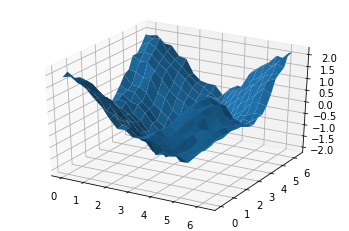

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.fft import fft2
from scipy.fft import ifft2
# Period
T = T1 = T2 = 2 * np.pi
# Number of sample points
N = N1 = N2 = 20
# Linspace
x, y = np.meshgrid(np.linspace(0.0, T1, N1), np.linspace(0.0, T2, N2))
# Original signal
input_sig = np.cos(x) + np.cos(y) + np.random.normal(0, 0.1, [N1, N2])
# Drawing
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.plot_surface(x, y, input_sig)

max error:  2.1827872842550278e-11
mean error:  1.2040006578534214e-13


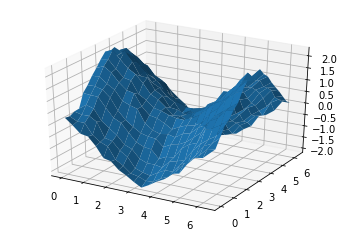

In [16]:
# Fourier transform
input_ft = fft2(input_sig)
# PSD
input_psd = (abs(input_ft))**2
input_ft.real += 0.0000000001
input_phase = input_ft.imag / input_ft.real
# Simulating a signal
noise = np.random.normal(0, 1, [N1, N2])
noise_ft = fft2(noise)
output_ft = noise_ft
output_ft.real = np.sqrt(input_psd) * np.sign(noise_ft.real)
output_signal = ifft2(output_ft.real) # SIMULATED SIGNAL
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.plot_surface(x, y, output_signal.real)
# Checking accuracy - somparing input and output PSD
output_ft2 = fft2(output_signal.real)
output_psd = (abs(output_ft2))**2
print("max error: ", np.max(abs(output_psd - input_psd)))
print("mean error: ", np.mean(abs(output_psd - input_psd)))